Building from `sam_test.ipynb`

In [77]:
import os
os.getenv("LD_LIBRARY_PATH")

'/home/annazan/miniconda3/envs/fair38/lib/python3.8/site-packages/cv2/../../lib64::/home/annazan/miniconda3/envs/fair38/lib/'

In [78]:
!echo $LD_LIBRARY_PATH
!source ~/.bashrc
!echo $LD_LIBRARY_PATH


/bin/bash: /home/annazan/miniconda3/envs/fair38/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/home/annazan/miniconda3/envs/fair38/lib/python3.8/site-packages/cv2/../../lib64::/home/annazan/miniconda3/envs/fair38/lib/
/bin/bash: /home/annazan/miniconda3/envs/fair38/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/annazan/miniconda3/envs/fair38/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/home/annazan/miniconda3/envs/fair38/lib/python3.8/site-packages/cv2/../../lib64::/home/annazan/miniconda3/envs/fair38/lib/


In [79]:

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [80]:
import os
import sys
print(os.getcwd())
os.environ.update(os.environ)
        # Add a new environment variable to the operating system
os.environ["RAMP_HOME"] = os.getcwd()
# Print the environment variables to verify that the new variable was added
print(os.environ["RAMP_HOME"])
sys.path.append('../')
sys.path.append('../ramp-code/')
sys.path.append('ramp-code')


/home/annazan/fAIr-utilities
/home/annazan/fAIr-utilities


In [84]:
import warnings
warnings.filterwarnings("ignore")
os.environ["SM_FRAMEWORK"] = "tf.keras"
import cv2
import ramp.utils
import hot_fair_utilities

# base_path = f"{os.getcwd()}/ramp-data/sample_2"
# base_path = "/home/annazan/fAIr-utilities/ramp-data/test_data/1_Zanzibar"
# base_path = f"{os.getcwd()}/ramp-data/test_data/1_Zanzibar"
base_path = f'{os.getcwd()}/ramp-data/test_data/model95_td370'
model_input_image_path = f"{base_path}/input"
# preprocess_output=f"{base_path}/preprocessed"
preprocess_output=f"{base_path}"
train_output = f"{base_path}/train"

In [83]:
train_output
# preprocess_output
# model_input_image_path
# base_path

'/home/annazan/fAIr-utilities/ramp-data/test_data/model95_td370'

In [6]:
# from hot_fair_utilities import preprocess

# preprocess(
#     input_path = model_input_image_path,
#     output_path = preprocess_output,
#     rasterize=True,
#     # rasterize_options=["binary"],
#     rasterize_options=["binary"],
#     georeference_images=True,

# )

In [7]:
# # Make multimask path
# !mkdir ramp-data/test_data/1_Zanzibar/preprocessed/multimasks/
# # Run script for multi-mask: https://github.com/kshitijrajsharma/ramp-code-fAIr/blob/ae33b11364f0a61f278ce9ff93446586704ea275/scripts/multi_masks_from_polygons.py
# !python ramp-code/scripts/multi_masks_from_polygons.py -in_vecs ramp-data/test_data/1_Zanzibar/preprocessed/labels/ -in_chips ramp-data/test_data/1_Zanzibar/preprocessed/chips/ -out ramp-data/test_data/1_Zanzibar/preprocessed/multimasks/ -bwidth 2 -csp 4

In [8]:
preprocess_output=f"{base_path}"

from hot_fair_utilities.training.prepare_data import split_training_2_validation
x = split_training_2_validation(preprocess_output, train_output)

ramp home is /home/annazan/fAIr-utilities
python home is None
variables are: src /home/annazan/fAIr-utilities/ramp-data/test_data/model95_td370/
 and dst:/home/annazan/fAIr-utilities/ramp-data/test_data/model95_td370//train


Writing /home/annazan/fAIr-utilities/ramp-data/test_data/model95_td370//train/fair_split_train.csv
Writing /home/annazan/fAIr-utilities/ramp-data/test_data/model95_td370//train/fair_split_val.csv


In [9]:
import datetime
from ramp.training import (
    callback_constructors,
    loss_constructors,
    metric_constructors,
    model_constructors,
    optimizer_constructors,
)

In [10]:
from hot_fair_utilities.training.run_training import manage_fine_tuning_config

output_path=train_output
epoch_size=2
batch_size=2
freeze_layers=False
cfg = manage_fine_tuning_config(
            output_path, epoch_size, batch_size, freeze_layers
        )

In [11]:
print("Config:")
print(cfg)

Config:
{'experiment_name': 'HOT-OSM Efficient-Unet Finetune model_set1_batch20_epoch20_imgAug', 'discard_experiment': False, 'logging': {'log_experiment': True, 'experiment_log_path': 'ramp-data/TRAIN/fAIr-experiments.csv', 'experiment_notes': 'Binary Mask model, batchsize 20, 20 epochs on HOT-OSM dataset 1 Multizoom, finetuning from RAMP saved model', 'fields_to_log': ['experiment_name', 'experiment_notes', 'timestamp', 'num_epochs', 'batch_size', 'output_img_shape', 'input_img_shape', 'get_loss_fn_name', 'use_saved_model', 'use_aug', 'use_early_stopping', 'use_clr', 'random_seed', 'num_classes', 'get_optimizer_fn_name', 'tb_logs_dir', 'get_model_fn_name', 'backbone', 'train_img_dir', 'train_mask_dir', 'val_img_dir', 'val_mask_dir']}, 'datasets': {'train_img_dir': '/home/annazan/fAIr-utilities/ramp-data/test_data/model95_td370//train/chips', 'train_mask_dir': '/home/annazan/fAIr-utilities/ramp-data/test_data/model95_td370//train/binarymasks', 'val_img_dir': '/home/annazan/fAIr-utilit

In [12]:
discard_experiment = False
if "discard_experiment" in cfg:
    discard_experiment = cfg["discard_experiment"]
cfg["timestamp"] = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [13]:

the_metrics = []
if cfg["metrics"]["use_metrics"]:
    get_metrics_fn_names = cfg["metrics"]["get_metrics_fn_names"]
    get_metrics_fn_parms = cfg["metrics"]["metrics_fn_parms"]
    assert len(get_metrics_fn_names) == len(get_metrics_fn_parms)
    
    
    #---
    # TODO: manually changing here for OHE experiment
    # get_metrics_fn_names = ["get_precision_fn", "get_iou_fn"]
    # get_metrics_fn_names = ["get_sparse_categorical_accuracy_fn", "get_precision_fn", "get_iou_fn", "get_recall_fn"]
    # get_metrics_fn_parms = [{}, {}, {}, {}]
    # get_metrics_fn_names = ["get_precision_fn", "get_recall_fn"]
    get_metrics_fn_names = [ "get_precision_fn", "get_iou_fn", "get_recall_fn"]
    get_metrics_fn_parms = [{}, {}, {}]
    #---
    for get_mf_name, mf_parms in zip(get_metrics_fn_names, get_metrics_fn_parms):
        
        get_metric_fn = getattr(metric_constructors, get_mf_name)
        print(f"Metric constructor function: {get_metric_fn.__name__}")
        metric_fn = get_metric_fn(mf_parms)
        the_metrics.append(metric_fn)

# specify a function that will construct the loss function
get_loss_fn_name = cfg["loss"]["get_loss_fn_name"]

#---
# TODO: manually changing here for OHE experiment
# get_loss_fn_name = ["get_sparse_categorical_crossentropy_fn", "get_categorical_crossentropy_fn"]
# get_loss_fn_parms = [{}, {}]
get_loss_fn_name = ["get_categorical_crossentropy_fn"]
get_loss_fn_parms = [{}]
# ---

# get_loss_fn = getattr(loss_constructors, get_loss_fn_name)
# # Construct the loss function
# loss_fn = get_loss_fn(cfg)

# print(f"Loss constructor function: {get_loss_fn.__name__}")

the_losses = []
for get_lf_name, lf_parms in zip(get_loss_fn_name, get_loss_fn_parms):
    
    get_loss_fn = getattr(loss_constructors, get_lf_name)
    print(f"Loss constructor functions: {get_loss_fn.__name__}")
    loss_fn = get_loss_fn(lf_parms)
    the_losses.append(loss_fn)

Metric constructor function: get_precision_fn
Metric constructor function: get_iou_fn
Metric constructor function: get_recall_fn
Loss constructor functions: get_categorical_crossentropy_fn


In [14]:
from pathlib import Path

#### construct optimizer ####
get_optimizer_fn_name = cfg["optimizer"]["get_optimizer_fn_name"]
get_optimizer_fn = getattr(optimizer_constructors, get_optimizer_fn_name)

optimizer = get_optimizer_fn(cfg)

the_model = None

# SG: Using the saved model in this cell
working_ramp_home = os.environ["RAMP_HOME"]
# load (construct) the model
model_path = Path(working_ramp_home) / cfg["saved_model"]["saved_model_path"]
print(f"Model: importing saved model {str(model_path)}")
the_model = tf.keras.models.load_model(model_path)
assert (
    the_model is not None
), f"the saved model was not constructed: {model_path}"

if cfg["freeze_layers"]:
    for layer in the_model.layers:
        layer.trainable = False  # freeze previous layers only update new layers
        # print("Setting previous model layers traininable : False")


print("-------")
print(f'-------{the_metrics}')
print("-------")

# If you don't want to save the original state of training, recompile the model.
the_model.compile(optimizer=optimizer, loss=loss_fn, metrics=[the_metrics])
# the_model.compile(optimizer=optimizer, loss=loss_fn, metrics=[precision_class_0,precision_class_1])

# the_model.compile(optimizer = optimizer,
#    loss=loss_fn,
#    metrics = [get_iou_coef_fn])

Model: importing saved model /home/annazan/fAIr-utilities/ramp-code/ramp/checkpoint.tf
-------
-------[<keras.metrics.metrics.Precision object at 0x7f85c464a580>, <keras.metrics.metrics.IoU object at 0x7f85c464a970>, <keras.metrics.metrics.Recall object at 0x7f85c464a490>]
-------


In [15]:
# Example of non-sparse loss fn with probs over labels and OHE labels (total 4 classes)
y_true = tf.one_hot([0, 1], depth=4, axis=-1)
y_pred = [[0.05, 0.95, 0, 0], [0.1, 0.8, 0.1, 0]]
loss_fn(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=1.609438>

In [16]:
y_true

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)>

In [17]:
y_pred

[[0.05, 0.95, 0, 0], [0.1, 0.8, 0.1, 0]]

In [18]:
print(f"Loss constructor function: {loss_fn}")

Loss constructor function: <keras.losses.CategoricalCrossentropy object at 0x7f85c43d3070>


In [19]:
the_model.loss(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=1.609438>

In [20]:
# print("Model summary:")
# print(the_model.summary())

In [21]:
#---
# TODO: manually changing here for OHE experiment
def ohe_batches(batches: tf.data.Dataset, depth=4) -> tf.data.Dataset:
    """For given batches and depth map sparse labels to OHE."""
    return batches.map(lambda x, y: (x, tf.one_hot(y[..., -1], depth, axis=-1)))
#---

In [22]:
from ramp.training.augmentation_constructors import get_augmentation_fn
from ramp.utils.misc_ramp_utils import get_num_files
from ramp.data_mgmt.data_generator import (
    test_batches_from_gtiff_dirs,
    training_batches_from_gtiff_dirs,
)
#### define data directories ####
train_img_dir = Path(working_ramp_home) / cfg["datasets"]["train_img_dir"]
train_mask_dir = Path(working_ramp_home) / cfg["datasets"]["train_mask_dir"]
val_img_dir = Path(working_ramp_home) / cfg["datasets"]["val_img_dir"]
val_mask_dir = Path(working_ramp_home) / cfg["datasets"]["val_mask_dir"]

#### get the augmentation transform ####
# aug = None
if cfg["augmentation"]["use_aug"]:
    aug = get_augmentation_fn(cfg)

## RUNTIME Parameters
batch_size = cfg["batch_size"]
input_img_shape = cfg["input_img_shape"]
output_img_shape = cfg["output_img_shape"]

n_training = get_num_files(train_img_dir, "*.tif")
n_val = get_num_files(val_img_dir, "*.tif")
steps_per_epoch = n_training // batch_size
validation_steps = n_val // batch_size
# Testing step , not recommended
if validation_steps <= 0:
    validation_steps = 1

# add these back to the config
# in case they are needed by callbacks
cfg["runtime"] = {}
cfg["runtime"]["n_training"] = n_training
cfg["runtime"]["n_val"] = n_val
cfg["runtime"]["steps_per_epoch"] = steps_per_epoch
cfg["runtime"]["validation_steps"] = validation_steps

train_batches = None

if aug is not None:
    train_batches = training_batches_from_gtiff_dirs(
        train_img_dir,
        train_mask_dir,
        batch_size,
        input_img_shape,
        output_img_shape,
        transforms=aug,
    )
else:
    train_batches = training_batches_from_gtiff_dirs(
        train_img_dir, train_mask_dir, batch_size, input_img_shape, output_img_shape
    )
assert train_batches is not None, "training batches were not constructed"
print(f"-------\n* train img dir{train_img_dir}\n* train mask dir{train_mask_dir}")
print(f"* input img shape{input_img_shape}\n* output img shape{output_img_shape}")


#---
# TODO: manually changing here for OHE experiment
train_batches = ohe_batches(train_batches)
#---
print(train_batches)

-------
* train img dir/home/annazan/fAIr-utilities/ramp-data/test_data/model95_td370/train/chips
* train mask dir/home/annazan/fAIr-utilities/ramp-data/test_data/model95_td370/train/binarymasks
* input img shape[256, 256]
* output img shape[256, 256]
<MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 256, 256, 4), dtype=tf.float32, name=None))>


In [23]:
# Batches are a tf.data.Dataset type
print(train_batches)

<MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 256, 256, 4), dtype=tf.float32, name=None))>


In [24]:

# Get a single batch as numpy to explore
iter = tf.data.Dataset.as_numpy_iterator(train_batches)
(X_batch, y_true_batch) = iter.next()


In [25]:
# for elem in iter:
#   print(elem)

In [26]:

y_true_batch.size # 524288
# y_true_batch.itemsize # 4

524288

In [27]:
X_batch.size # 393216
# X_batch.itemsize # 4

393216

In [28]:
y_true_batch[0, 0, 0, :]

array([1., 0., 0., 0.], dtype=float32)

In [29]:
import numpy as np
# Print useful info
print("Batch size is:", X_batch.shape[0])
# Appears to be floats between 0 and 1
print("Example X entry:", X_batch[0, 0, 0, :])
print("Input data shape (X):", X_batch.shape)
print("Ground truth data shape (y_true):", y_true_batch.shape)
print("Example y_true: ", y_true_batch[1, 0, 0, :])
print(f"The unique labels in the y_true: {np.unique(y_true_batch[0, :, :, 0])}")

Batch size is: 2
Example X entry: [0.06786785 0.06786785 0.06786785]
Input data shape (X): (2, 256, 256, 3)
Ground truth data shape (y_true): (2, 256, 256, 4)
Example y_true:  [1. 0. 0. 0.]
The unique labels in the y_true: [0. 1.]


In [30]:
# Get some predictions from the model for the batch
y_pred_batch = the_model.predict(X_batch)

1/1 [==============================] - 3s 3s/step


In [31]:
# Shape of output predictions
print("Predictions y_pred_batch are:", y_pred_batch.shape)


Predictions y_pred_batch are: (2, 256, 256, 4)


In [32]:
y_pred_batch.dtype

dtype('float32')

In [33]:
# Example single pixel prediction
single_prediction = y_pred_batch[0, 0, 0, :]
print(single_prediction)

# Single prediction sums to 1: probabilties over the four categories of the model
single_prediction.sum().round()

[9.9108499e-01 4.7262857e-04 8.2368916e-03 2.0547237e-04]


1.0

In [34]:
the_model.loss(y_true_batch, y_pred_batch)

<tf.Tensor: shape=(), dtype=float32, numpy=2.2767544>

In [35]:
# Validation batches
val_batches = test_batches_from_gtiff_dirs(
    val_img_dir, val_mask_dir, batch_size, input_img_shape, output_img_shape
)

#---
# TODO: manually changing here for OHE experiment
val_batches = ohe_batches(val_batches)
#---

assert val_batches is not None, "validation batches were not constructed"
print(f"-------\n* val img dir{val_img_dir}\n* val mask dir{val_mask_dir}\n-------")
print(val_batches)
print('*\n*\n')


-------
* val img dir/home/annazan/fAIr-utilities/ramp-data/test_data/model95_td370/train/val-chips
* val mask dir/home/annazan/fAIr-utilities/ramp-data/test_data/model95_td370/train/val-binarymasks
-------
<MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 256, 256, 4), dtype=tf.float32, name=None))>
*
*



In [36]:
# Set up training
# ---------------
## Callbacks ##
callbacks_list = []

if not discard_experiment:
    # get model checkpoint callback
    if cfg["model_checkpts"]["use_model_checkpts"]:
        get_model_checkpt_callback_fn_name = cfg["model_checkpts"][
            "get_model_checkpt_callback_fn_name"
        ]
        get_model_checkpt_callback_fn = getattr(
            callback_constructors, get_model_checkpt_callback_fn_name
        )
        callbacks_list.append(get_model_checkpt_callback_fn(cfg))

    # get tensorboard callback
    if cfg["tensorboard"]["use_tb"]:
        get_tb_callback_fn_name = cfg["tensorboard"]["get_tb_callback_fn_name"]
        get_tb_callback_fn = getattr(callback_constructors, get_tb_callback_fn_name)
        callbacks_list.append(get_tb_callback_fn(cfg))

    # get tensorboard model prediction logging callback
    if cfg["prediction_logging"]["use_prediction_logging"]:
        assert cfg["tensorboard"][
            "use_tb"
        ], "Tensorboard logging must be turned on to enable prediction logging"
        get_prediction_logging_fn_name = cfg["prediction_logging"][
            "get_prediction_logging_fn_name"
        ]
        get_prediction_logging_fn = getattr(
            callback_constructors, get_prediction_logging_fn_name
        )
        callbacks_list.append(get_prediction_logging_fn(the_model, cfg))

# free up RAM
tf.keras.backend.clear_session()

if cfg["early_stopping"]["use_early_stopping"]:
    callbacks_list.append(callback_constructors.get_early_stopping_callback_fn(cfg))

    # get cyclic learning scheduler callback
if cfg["cyclic_learning_scheduler"]["use_clr"]:
    assert not cfg["early_stopping"][
        "use_early_stopping"
    ], "cannot use early_stopping with cycling_learning_scheduler"
    get_clr_callback_fn_name = cfg["cyclic_learning_scheduler"][
        "get_clr_callback_fn_name"
    ]
    get_clr_callback_fn = getattr(callback_constructors, get_clr_callback_fn_name)
    callbacks_list.append(get_clr_callback_fn(cfg))

In [37]:
callbacks_list

In [38]:
call = callbacks_list[0]
call.filepath

'/home/annazan/fAIr-utilities/ramp-data/test_data/model95_td370/train/model-checkpts/20240312-145959/model_20240312-145959_{epoch:03d}_{val_recall_1:.3f}.tf'

In [66]:

import matplotlib.pyplot as plt
from time import perf_counter

## Main training block ##
n_epochs = cfg["num_epochs"]
# SG: manually make this 10
n_epochs = 20
print(
    f"Starting Training with {n_epochs} epochs , {batch_size} batch size , {steps_per_epoch} steps per epoch , {validation_steps} validation steps......"
)
if validation_steps <= 0:
    raise RaiseError(
        "Not enough data for training, Increase image or Try reducing batchsize/epochs"
    )
# FIXME : Make checkpoint
start = perf_counter()
history = the_model.fit(
    train_batches,
    epochs=n_epochs,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_batches,
    validation_steps=validation_steps,
    callbacks=callbacks_list,
)
end = perf_counter()
print(f"Training Finished , Time taken to train : {end-start} seconds")
print('\n-----\nHistory:')
print(history.history.keys())
print('\n-----')


Starting Training with 20 epochs , 2 batch size , 71 steps per epoch , 12 validation steps......
Epoch 1/20


71/71 [==============================] - 8s 103ms/step - loss: 0.2072 - precision_1: 0.8262 - iou: 0.4419 - recall_1: 0.7741 - val_loss: 0.4152 - val_precision_1: 0.9404 - val_iou: 0.4647 - val_recall_1: 0.6518
Epoch 2/20
71/71 [==============================] - 26s 373ms/step - loss: 0.1749 - precision_1: 0.8662 - iou: 0.4441 - recall_1: 0.8174 - val_loss: 0.3627 - val_precision_1: 0.9105 - val_iou: 0.4764 - val_recall_1: 0.7364
Epoch 3/20
71/71 [==============================] - 7s 102ms/step - loss: 0.1598 - precision_1: 0.8722 - iou: 0.4411 - recall_1: 0.8168 - val_loss: 0.4660 - val_precision_1: 0.8897 - val_iou: 0.4203 - val_recall_1: 0.7283
Epoch 4/20
71/71 [==============================] - 7s 102ms/step - loss: 0.1515 - precision_1: 0.8887 - iou: 0.4422 - recall_1: 0.8261 - val_loss: 0.7184 - val_precision_1: 0.9127 - val_iou: 0.4573 - val_recall_1: 0.6823
Epoch 5/20
71/71 [==============================] - 7s 102ms/step - loss: 0.1337 - precision_1: 0.8989 - iou: 0.4437 - rec

In [52]:
print('\n-----\nHistory:')
print(history.history.keys())

print(f"train iou {history.history['iou']}")
print(f"valid iou {history.history['val_iou']}")
print(f'train recall {history.history["recall_1"]}')
print(f'valid recall {history.history["val_recall_1"]}')
print(f'train precision {history.history["precision_1"]}')
print(f'valid precision {history.history["val_precision_1"]}')
print('\n-----')


-----
History:
dict_keys(['loss', 'precision_1', 'iou', 'recall_1', 'val_loss', 'val_precision_1', 'val_iou', 'val_recall_1'])
train iou [0.44971269369125366, 0.4476446211338043, 0.4443782866001129, 0.4488651752471924, 0.444240003824234]
valid iou [0.46160560846328735, 0.465709388256073, 0.41515156626701355, 0.4089380204677582, 0.4242381453514099]
train recall [0.6502562165260315, 0.699068009853363, 0.7313550710678101, 0.739618182182312, 0.7639274597167969]
valid recall [0.6221495866775513, 0.6497960090637207, 0.7274585366249084, 0.6056893467903137, 0.6624175310134888]
train precision [0.7702937722206116, 0.7786323428153992, 0.7863540053367615, 0.7934978604316711, 0.8246399164199829]
valid precision [0.8884291648864746, 0.8967007398605347, 0.888365626335144, 0.9184869527816772, 0.9149730205535889]

-----


In [70]:
output_path

'/home/annazan/fAIr-utilities/ramp-data/test_data/model95_td370//train'

In [ ]:
output_filename = f'{output_path}'

In [56]:
np.save('my_history.npy',history.history)

In [57]:
history_saved=np.load('my_history.npy',allow_pickle='TRUE').item()
history_saved.keys()

dict_keys(['loss', 'precision_1', 'iou', 'recall_1', 'val_loss', 'val_precision_1', 'val_iou', 'val_recall_1'])

In [58]:
import pandas as pd
history_saved_df = pd.DataFrame.from_dict(history_saved)
history_saved_df

,loss,precision_1,iou,recall_1,val_loss,val_precision_1,val_iou,val_recall_1
0,0.271791,0.770294,0.449713,0.650256,0.474879,0.888429,0.461606,0.622150
1,0.260085,0.778632,0.447645,0.699068,0.386436,0.896701,0.465709,0.649796
2,0.241235,0.786354,0.444378,0.731355,0.372247,0.888366,0.415152,0.727459
3,0.246488,0.793498,0.448865,0.739618,0.575786,0.918487,0.408938,0.605689
4,0.213068,0.824640,0.444240,0.763927,0.475002,0.914973,0.424238,0.662418


In [59]:
history_last = pd.DataFrame.from_dict(history_saved)[-1:]
history_last_df 

,loss,precision_1,iou,recall_1,val_loss,val_precision_1,val_iou,val_recall_1
4,0.213068,0.82464,0.44424,0.763927,0.475002,0.914973,0.424238,0.662418


Generating graphs ....
Graph generated at : /home/annazan/fAIr-utilities/ramp-data/test_data/model95_td370//train/graphs


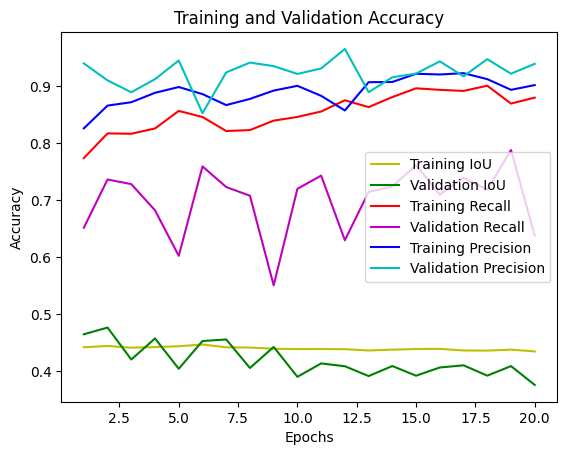

In [69]:

# plot the training and validation accuracy and loss at each epoch
print("Generating graphs ....")
if not os.path.exists(cfg["graph_location"]):
    os.mkdir(cfg["graph_location"])

loss = history.history["loss"]
# val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

# acc = history.history["sparse_categorical_accuracy"]
# val_acc = history.history["val_sparse_categorical_accuracy"]

#---
# TODO: updated for OHE
acc = history.history["iou"]
val_acc = history.history["val_iou"]
acc1 = history.history["recall_1"]
val_acc1 = history.history["val_recall_1"]
acc2 = history.history["precision_1"]
val_acc2 = history.history["val_precision_1"]
#---

# Plot training and validation accuracy
plt.plot(epochs, acc, "y", label="Training IoU")
plt.plot(epochs, val_acc, "g", label="Validation IoU")
plt.plot(epochs, acc1, "r", label="Training Recall")
plt.plot(epochs, val_acc1, "m", label="Validation Recall")
plt.plot(epochs, acc2, "b", label="Training Precision")
plt.plot(epochs, val_acc2, "c", label="Validation Precision")

# Set labels and title
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")

plt.legend()
plt.savefig(
    f"{cfg['graph_location']}/training_validation_sparse_categorical_accuracy.png"
)
print(f"Graph generated at : {cfg['graph_location']}")
# print(f"train accuracy {acc}")
# print(f"valid accuracy {val_acc}")
# print(f"loss {loss}")


---

In [ ]:

# # APPENDIX: from copying across

# #### construct optimizer ####
# get_optimizer_fn_name = cfg["optimizer"]["get_optimizer_fn_name"]
# get_optimizer_fn = getattr(optimizer_constructors, get_optimizer_fn_name)

# optimizer = get_optimizer_fn(cfg)

# the_model = None

# if cfg["saved_model"]["use_saved_model"]:
#     # load (construct) the model
#     model_path = Path(working_ramp_home) / cfg["saved_model"]["saved_model_path"]
#     print(f"Model: importing saved model {str(model_path)}")
#     the_model = tf.keras.models.load_model(model_path)
#     assert (
#         the_model is not None
#     ), f"the saved model was not constructed: {model_path}"

#     if cfg["freeze_layers"]:
#         for layer in the_model.layers:
#             layer.trainable = False  # freeze previous layers only update new layers
#             # print("Setting previous model layers traininable : False")

#     if not cfg["saved_model"]["save_optimizer_state"]:
#         print("-------")
#         print(f'-------{the_metrics}')
#         print("-------")
        
#         # For class 0
#         precision_class_0 = Precision(class_id=0)
#         # For class 1
#         precision_class_1 = Precision(class_id=1)
#         metrics=[precision_class_0,precision_class_1]
#         print(f'-------{the_metrics}')
#         print("-------")
        
#         # If you don't want to save the original state of training, recompile the model.
#         the_model.compile(optimizer=optimizer, loss=loss_fn, metrics=[the_metrics])
#         # the_model.compile(optimizer=optimizer, loss=loss_fn, metrics=[precision_class_0,precision_class_1])
        
#         # the_model.compile(optimizer = optimizer,
#         #    loss=loss_fn,
#         #    metrics = [get_iou_coef_fn])

# if not cfg["saved_model"]["use_saved_model"]:
#     get_model_fn_name = cfg["model"]["get_model_fn_name"]
#     get_model_fn = getattr(model_constructors, get_model_fn_name)
#     the_model = get_model_fn(cfg)

#     assert the_model is not None, f"the model was not constructed: {model_path}"
#     the_model.compile(optimizer=optimizer, loss=loss_fn, metrics=the_metrics)

# print(the_model)
# cfg["datasets"]

# #### define data directories ####
# train_img_dir = Path(working_ramp_home) / cfg["datasets"]["train_img_dir"]
# train_mask_dir = Path(working_ramp_home) / cfg["datasets"]["train_mask_dir"]
# val_img_dir = Path(working_ramp_home) / cfg["datasets"]["val_img_dir"]
# val_mask_dir = Path(working_ramp_home) / cfg["datasets"]["val_mask_dir"]

# #### get the augmentation transform ####
# # aug = None
# if cfg["augmentation"]["use_aug"]:
#     aug = get_augmentation_fn(cfg)

# ## RUNTIME Parameters
# batch_size = cfg["batch_size"]
# input_img_shape = cfg["input_img_shape"]
# output_img_shape = cfg["output_img_shape"]

# n_training = get_num_files(train_img_dir, "*.tif")
# n_val = get_num_files(val_img_dir, "*.tif")
# steps_per_epoch = n_training // batch_size
# validation_steps = n_val // batch_size
# # Testing step , not recommended
# if validation_steps <= 0:
#     validation_steps = 1

# # add these back to the config
# # in case they are needed by callbacks
# cfg["runtime"] = {}
# cfg["runtime"]["n_training"] = n_training
# cfg["runtime"]["n_val"] = n_val
# cfg["runtime"]["steps_per_epoch"] = steps_per_epoch
# cfg["runtime"]["validation_steps"] = validation_steps

# train_batches = None

# if aug is not None:
#     train_batches = training_batches_from_gtiff_dirs(
#         train_img_dir,
#         train_mask_dir,
#         batch_size,
#         input_img_shape,
#         output_img_shape,
#         transforms=aug,
#     )
# else:
#     train_batches = training_batches_from_gtiff_dirs(
#         train_img_dir, train_mask_dir, batch_size, input_img_shape, output_img_shape
#     )

# assert train_batches is not None, "training batches were not constructed"
# print(f"-------\n* train img dir{train_img_dir}\n* train mask dir{train_mask_dir}")
# print(f"* input img shape{input_img_shape}\n* output img shape{output_img_shape}")

# print(train_batches)

# val_batches = test_batches_from_gtiff_dirs(
#     val_img_dir, val_mask_dir, batch_size, input_img_shape, output_img_shape
# )

# assert val_batches is not None, "validation batches were not constructed"
# print(f"-------\n* val img dir{val_img_dir}\n* val mask dir{val_mask_dir}\n-------")
# print(val_batches)
# print('*\n*\n')

# ## Callbacks ##
# callbacks_list = []

# if not discard_experiment:
#     # get model checkpoint callback
#     if cfg["model_checkpts"]["use_model_checkpts"]:
#         get_model_checkpt_callback_fn_name = cfg["model_checkpts"][
#             "get_model_checkpt_callback_fn_name"
#         ]
#         get_model_checkpt_callback_fn = getattr(
#             callback_constructors, get_model_checkpt_callback_fn_name
#         )
#         callbacks_list.append(get_model_checkpt_callback_fn(cfg))

#     # get tensorboard callback
#     if cfg["tensorboard"]["use_tb"]:
#         get_tb_callback_fn_name = cfg["tensorboard"]["get_tb_callback_fn_name"]
#         get_tb_callback_fn = getattr(callback_constructors, get_tb_callback_fn_name)
#         callbacks_list.append(get_tb_callback_fn(cfg))

#     # get tensorboard model prediction logging callback
#     if cfg["prediction_logging"]["use_prediction_logging"]:
#         assert cfg["tensorboard"][
#             "use_tb"
#         ], "Tensorboard logging must be turned on to enable prediction logging"
#         get_prediction_logging_fn_name = cfg["prediction_logging"][
#             "get_prediction_logging_fn_name"
#         ]
#         get_prediction_logging_fn = getattr(
#             callback_constructors, get_prediction_logging_fn_name
#         )
#         callbacks_list.append(get_prediction_logging_fn(the_model, cfg))

# # free up RAM
# keras.backend.clear_session()

# if cfg["early_stopping"]["use_early_stopping"]:
#     callbacks_list.append(callback_constructors.get_early_stopping_callback_fn(cfg))

#     # get cyclic learning scheduler callback
# if cfg["cyclic_learning_scheduler"]["use_clr"]:
#     assert not cfg["early_stopping"][
#         "use_early_stopping"
#     ], "cannot use early_stopping with cycling_learning_scheduler"
#     get_clr_callback_fn_name = cfg["cyclic_learning_scheduler"][
#         "get_clr_callback_fn_name"
#     ]
#     get_clr_callback_fn = getattr(callback_constructors, get_clr_callback_fn_name)
#     callbacks_list.append(get_clr_callback_fn(cfg))

# ## Main training block ##
# n_epochs = cfg["num_epochs"]
# print(
#     f"Starting Training with {n_epochs} epochs , {batch_size} batch size , {steps_per_epoch} steps per epoch , {validation_steps} validation steps......"
# )
# if validation_steps <= 0:
#     raise RaiseError(
#         "Not enough data for training, Increase image or Try reducing batchsize/epochs"
#     )
# # FIXME : Make checkpoint
# start = perf_counter()
# history = the_model.fit(
#     train_batches,
#     epochs=n_epochs,
#     steps_per_epoch=steps_per_epoch,
#     validation_data=val_batches,
#     validation_steps=validation_steps,
#     callbacks=callbacks_list,
# )
# end = perf_counter()
# print(f"Training Finished , Time taken to train : {end-start} seconds")
# print('\n-----\nHistory:')
# print(history.history.keys())
# print('\n-----')

# # plot the training and validation accuracy and loss at each epoch
# print("Generating graphs ....")
# if not os.path.exists(cfg["graph_location"]):
#     os.mkdir(cfg["graph_location"])

# loss = history.history["loss"]
# # val_loss = history.history["val_loss"]
# epochs = range(1, len(loss) + 1)

# acc = history.history["sparse_categorical_accuracy"]
# val_acc = history.history["val_sparse_categorical_accuracy"]

# # Plot training and validation accuracy
# plt.plot(epochs, acc, "y", label="Training Accuracy")
# plt.plot(epochs, val_acc, "r", label="Validation Accuracy")

# # Set labels and title
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy")
# plt.title("Training and Validation Accuracy")

# plt.legend()
# plt.savefig(
#     f"{cfg['graph_location']}/training_validation_sparse_categorical_accuracy.png"
# )
# print(f"Graph generated at : {cfg['graph_location']}")
# print(f"accuracy {acc}")
# print(f"accuracy {val_acc}")
# print(f"loss {loss}")


In [ ]:
import pandas as pd
df = pd.read_csv("/home/annazan/fAIr-utilities/ramp-data/test_data/1_Zanzibar/train/fair_split_train.csv")
df.iloc[0, 0]

In [ ]:
from hot_fair_utilities import train
train_output = f"{base_path}train"
final_accuracy, final_model_path = train(
    input_path=preprocess_output,
    output_path=train_output,
    epoch_size=2,
    batch_size=2,
    model="ramp",
    model_home=os.environ["RAMP_HOME"]
)

[here a tf file is created (weights + structure)]

In [ ]:
print(final_accuracy,final_model_path)

In [ ]:
prediction_output = f"{os.getcwd()}/outputs/model51_td364/prediction"

In [ ]:


from hot_fair_utilities import predict


print(f"\n**\n** prediction output {prediction_output}")
print(f"\n**\n** prediction input {base_path}prediction/input")
predict(
    checkpoint_path=final_model_path,
    input_path=f"{base_path}prediction/input",
    prediction_path=prediction_output,
)

In [ ]:
from hot_fair_utilities import polygonize
geojson_output= f"{prediction_output}/prediction.geojson"
polygonize(
    input_path=prediction_output, 
    output_path=geojson_output,
    remove_inputs = True,
)